In [1]:
# Import Packages
import json
import geopandas as gpd
import requests
import numpy as np
import matplotlib.pyplot as plt
import requests
import pandas as pd
import matplotlib.dates as mdates

import numpy as np
from scipy import stats
from scipy.stats import linregress

In [2]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

<ipython-input-2-9174b814a709>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [20]:
# TSM, change path to where your data is downloaded
ib_tsm = pd.read_csv('ISEBAYTSM1.csv', parse_dates=True)
ib_tsm.head()

,,,,,,,,ISEBAYTSM
Ise Bay,TSM_2021-06-28_JP06-N3b (1),NaN,NaN,NaN,NaN,NaN,NaN,NaN
time,aoi,measurement,indicatorValue,referenceTime,dataProvider,eoSensor,colorCode,inputData
2019-10-05T00:00:00.000Z,"LatLng(34.75, 136.700001)",31.57,NaN,Invalid DateTime,JAXA/EORC,GCOM-C/SGLI,NaN,EORC product
2019-10-12T00:00:00.000Z,"LatLng(34.75, 136.700001)",-27.71,NaN,Invalid DateTime,JAXA/EORC,GCOM-C/SGLI,NaN,EORC product
2019-10-26T00:00:00.000Z,"LatLng(34.75, 136.700001)",149.25,NaN,Invalid DateTime,JAXA/EORC,GCOM-C/SGLI,NaN,EORC product


In [21]:
# CHL_A, change path to where your data is downloaded
ib_cha = pd.read_csv("Ise Bay, Chl-a_2021-06-28_JP04-N3b.csv", parse_dates=True).rename(columns={'measurement': 'CHL_A'})
ib_cha = ib_cha[["time", "CHL_A"]]
ib_cha.head()

,time,CHL_A
0,2019-01-05T00:00:00.000Z,90.19
1,2019-01-12T00:00:00.000Z,-44.89
2,2019-01-19T00:00:00.000Z,82.41
3,2019-01-26T00:00:00.000Z,290.35
4,2019-02-02T00:00:00.000Z,318.43


In [22]:
# Nagoya_2021-06-28_JP03-E9.csv
nagoya_car = pd.read_csv("Nagoya_2021-06-28_JP03-E9.csv", parse_dates=True).rename(columns={'measurement': 'CAR'})
nagoya_car.head()

,time,aoi,CAR,indicatorValue,referenceTime,dataProvider,eoSensor,colorCode,inputData
0,2019-11-27T00:00:00.000Z,"LatLng(35.08, 136.88)",0.86,/,Invalid DateTime,JAXA,ALOS-2,BLUE,industry
1,2020-01-03T00:00:00.000Z,"LatLng(35.08, 136.88)",0.66,/,Invalid DateTime,JAXA,Sentinel-1,BLUE,industry
2,2020-01-27T00:00:00.000Z,"LatLng(35.08, 136.88)",0.74,/,Invalid DateTime,JAXA,Sentinel-1,BLUE,industry
3,2020-01-31T00:00:00.000Z,"LatLng(35.08, 136.88)",0.72,/,Invalid DateTime,JAXA,ALOS-2,BLUE,industry
4,2020-02-08T00:00:00.000Z,"LatLng(35.08, 136.88)",0.96,/,Invalid DateTime,JAXA,Sentinel-1,BLUE,industry


In [23]:
ib_tsm

,,,,,,,,ISEBAYTSM
Ise Bay,TSM_2021-06-28_JP06-N3b (1),NaN,NaN,NaN,NaN,NaN,NaN,NaN
time,aoi,measurement,indicatorValue,referenceTime,dataProvider,eoSensor,colorCode,inputData
2019-10-05T00:00:00.000Z,"LatLng(34.75, 136.700001)",31.57,NaN,Invalid DateTime,JAXA/EORC,GCOM-C/SGLI,NaN,EORC product
2019-10-12T00:00:00.000Z,"LatLng(34.75, 136.700001)",-27.71,NaN,Invalid DateTime,JAXA/EORC,GCOM-C/SGLI,NaN,EORC product
2019-10-26T00:00:00.000Z,"LatLng(34.75, 136.700001)",149.25,NaN,Invalid DateTime,JAXA/EORC,GCOM-C/SGLI,NaN,EORC product
...,...,...,...,...,...,...,...,...
2021-04-17T00:00:00.000Z,"LatLng(34.75, 136.700001)",285.43,NaN,Invalid DateTime,JAXA/EORC,GCOM-C/SGLI,NaN,EORC product
2021-04-24T00:00:00.000Z,"LatLng(34.75, 136.700001)",191.62,NaN,Invalid DateTime,JAXA/EORC,GCOM-C/SGLI,NaN,EORC product
2021-05-01T00:00:00.000Z,"LatLng(34.75, 136.700001)",196.9,NaN,Invalid DateTime,JAXA/EORC,GCOM-C/SGLI,NaN,EORC product
2021-05-08T00:00:00.000Z,"LatLng(34.75, 136.700001)",198.81,NaN,Invalid DateTime,JAXA/EORC,GCOM-C/SGLI,NaN,EORC product


In [24]:
datetimes = pd.to_datetime(nagoya_car['time'])
nagoya_car['time'] = datetimes
print(nagoya_car.head())

                       time                    aoi   CAR indicatorValue  \
0 2019-11-27 00:00:00+00:00  LatLng(35.08, 136.88)  0.86              /   
1 2020-01-03 00:00:00+00:00  LatLng(35.08, 136.88)  0.66              /   
2 2020-01-27 00:00:00+00:00  LatLng(35.08, 136.88)  0.74              /   
3 2020-01-31 00:00:00+00:00  LatLng(35.08, 136.88)  0.72              /   
4 2020-02-08 00:00:00+00:00  LatLng(35.08, 136.88)  0.96              /   

      referenceTime dataProvider    eoSensor colorCode inputData  
0  Invalid DateTime         JAXA      ALOS-2      BLUE  industry  
1  Invalid DateTime         JAXA  Sentinel-1      BLUE  industry  
2  Invalid DateTime         JAXA  Sentinel-1      BLUE  industry  
3  Invalid DateTime         JAXA      ALOS-2      BLUE  industry  
4  Invalid DateTime         JAXA  Sentinel-1      BLUE  industry  


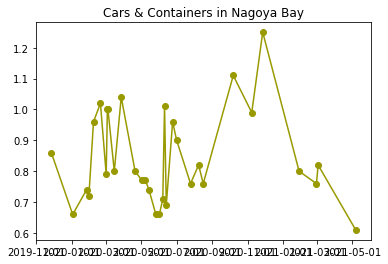

In [82]:
plt.plot(nagoya_car.time, nagoya_car.CAR, marker='o', color='#999900') 
formatter = mdates.DateFormatter("%Y-%m-%d")
ax = plt.gca()
ax.xaxis.set_major_formatter(formatter)
plt.title('Cars & Containers in Nagoya Bay')
plt.show()

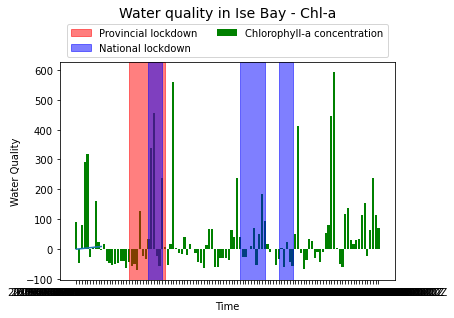

In [90]:
X = list(ib_cha.iloc[:, 0])
Y = list(ib_cha.iloc[:, 1])
  
# Plot the data using bar() method
plt.bar(X, Y, color='g', label = 'Chlorophyll-a concentration')
plt.title("Water quality in Ise Bay - Chl-a", y=1.18, fontsize=14)
plt.xlabel("Time")
plt.ylabel("Water Quality")

plt.plot(range(10))
plt.axvspan(19, 32, color='red', alpha=0.5, label = "Provincial lockdown")
plt.axvspan(26, 31, color='blue', alpha=0.5, label = "National lockdown")
plt.axvspan(59, 68, color='blue', alpha=0.5)
plt.axvspan(73, 78, color='blue', alpha=0.5)


plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.20), ncol=2)
plt.show()
  
# Show the plot
plt.show()

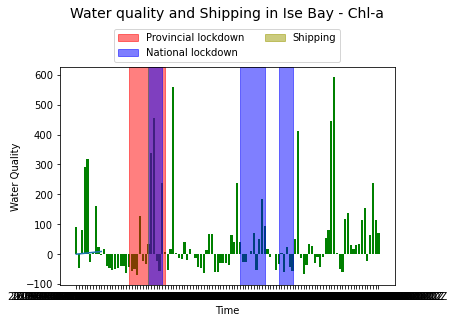

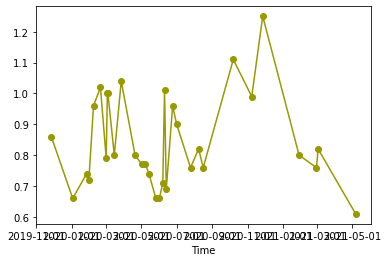

In [87]:
X = list(ib_cha.iloc[:, 0])
Y = list(ib_cha.iloc[:, 1])
  
# Plot the data using bar() method
plt.bar(X, Y, color='g')
plt.title("Water quality and Shipping in Ise Bay - Chl-a", y=1.20, fontsize=14)
plt.xlabel("Time")
plt.ylabel("Water Quality")

plt.plot(range(10))
plt.axvspan(19, 32, color='red', alpha=0.5, label = "Provincial lockdown")
plt.axvspan(26, 31, color='blue', alpha=0.5, label = "National lockdown")
plt.axvspan(59, 68, color='blue', alpha=0.5)
plt.axvspan(73, 78, color='blue', alpha=0.5)
plt.axvspan(26, 26, color='#999900', alpha=0.5, label = "Shipping")


plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.20), ncol=2)
plt.show()
  
# Show the plot
plt.show()


plt.plot(nagoya_car.time, nagoya_car.CAR, marker='o', color='#999900') 
formatter = mdates.DateFormatter("%Y-%m-%d")
ax = plt.gca()
ax.xaxis.set_major_formatter(formatter)
plt.xlabel("Time")
plt.ylabel("")
plt.show()